In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/spam.csv')
# df = pd.read_csv('spam.csv')
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,Label,EmailText,Label_01
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
 2   Label_01   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [ ]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# x1 = df.drop('Label', axis=1)
# y1 = df['Label']

In [ ]:
# y1.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

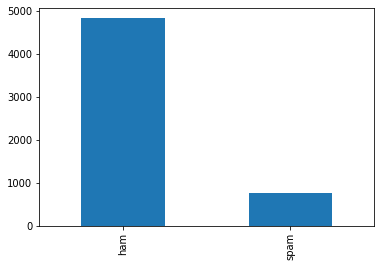

In [ ]:
# y1.value_counts().plot(kind='bar')

In [ ]:
# pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(x1, y1)

ValueError: ignored

In [ ]:
# y_smote.value_counts()

ham     747
spam    747
Name: Label, dtype: int64

In [ ]:
# df.isnull()

In [ ]:
# df.loc[df['Label'] == 'spam', 'Label',] = 0
# df.loc[df['Label'] == 'ham', 'Label',] = 1

In [ ]:
df['Label_01'] = df['Label'].replace(['ham','spam'],[1, 0])

In [ ]:
df

,Label,EmailText,Label_01
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ã_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [ ]:
X = df['EmailText'].values
y = df['Label_01'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [ ]:
# Converting String to Integer

cv = CountVectorizer()  
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
# print(X_train)

In [ ]:
# print(X_test)

In [ ]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 10)
# classifier.fit(X_train, y_train)
# print(classifier.score(X_test,y_test))

0.9766816143497757


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)
print(classifier.score(X_train_res,y_train_res))

0.7770897832817337


In [ ]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)

model.fit(X_train_res,y_train_res)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
print(model.score(X_test,y_test))

0.9237668161434978


# **Prediction on training data**

In [ ]:
# from sklearn.metrics import accuracy_score

In [ ]:
# prediction_on_training_data = model.predict(X_train)
# accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
# accuracy_on_training_data

0.9997756338344178

# **Prediction on testing data**

In [ ]:
# prediction_on_test_data = model.predict(X_test)
# accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [ ]:
# accuracy_on_test_data

0.979372197309417

In [ ]:
# df.loc[df['Label'] == 'spam', 'Label',] = 0
# df.loc[df['Label'] == 'ham', 'Label',] = 1

In [ ]:
# input_mail = ["Ffffffffff. Alright no way I can meet up with you sooner?"]

# input_data_features = cv.transform(input_mail)

# # making prediction

# prediction = model.predict(input_data_features)
# print(prediction)


# if (prediction[0]==1):
#   print('Ham mail')

# else:
#   print('Spam mail')

In [ ]:
df

,Label,EmailText,Label_01
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ã_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [ ]:
input_sure_ham = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
input_sure_spam = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

testing_data_from_dataset =[input_sure_ham, input_sure_spam]


input_data_features = cv.transform(testing_data_from_dataset)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


# change i == 1 or i == 'ham' according to the above cell 8

for i in prediction:
    if (i == 1):
      print('Ham mail')
    else:
      print('Spam mail')

[1 0]
Ham mail
Spam mail


In [ ]:
input_mail = [
"Hey, you have won a car !!!!. Conrgratzz",
"Dear applicant, Your CV has been recieved. Best regards",
"You have received $1000000 to your account",
"Join with our whatsapp group",
"Kindly check the previous email. Kind Regards"
]


input_data_features = cv.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


for i in prediction:
    if (i == 1):
      print('Ham mail')
    else:
      print('Spam mail')
    

# output should be:    
# ['spam', 'ham', 'spam', 'spam', 'ham']
# [0 1 0 0 1]


[0 1 0 0 1]
Spam mail
Ham mail
Spam mail
Spam mail
Ham mail
